<a href="https://colab.research.google.com/github/assaad19/HighSchool-Students-Loan-Prediction-Model/blob/main/Project_Loan_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study: Bank Loan Prediction
##Objective:

In this exercise, we will explore a dataset of banking information detailed below. We will build a model to predict the loan status for individuals based on their personal information.

##Dataset Description:
*   **Loan ID**
*   **Customer ID**
*   **Loan Status**(Fully Paid,Charged Off)
*   **Current Loan Amount**: The Loan amount requested.
*   **Term**(Short or Long term)
*   **Credit Score**(Numerical evaluation of creditworthiness.)
*   **Annual Income**
*   **Years in current job**
*   **Home Ownership**(Have Mortgage,Home Mortgage,Rent,Owned)
*   **Purpose**(Loan purpose)
*   **Monthly Debt**
*   **Years of credit history**(Period of time the accounts on your credit reports have been established.)
*   **Months since last delinquent**(Time since missed payment reported)
*   **Number of open accounts**
*   **Number of credit problems** ( when an individual don't pay their bils on time )
*   **Current Credit balance**
*   **Maximum Open Credit**
*   **Bankcrupties**(Legal insolvency declaration process)
*   **Tax Liens**( Legal claim on property ownership)
##**NOTES:**
This Dataset is found on Kaggle and was used to train this model.

##1.Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

#### Path To Data:

We need to sepcify the path to our dataset:

In [ ]:
Path_to_data='/content/credit_train.csv'

#### Read & visualize data
Data now is stored on disk in a csv (Comma Separated Values) file.

To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function.

In [ ]:
# read CSV file in Pandas
data = pd.read_csv(Path_to_data)
# display first 10 rows
data.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Task:** how many rows & columns in our dataset



In [ ]:
# get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 16728 rows and 19 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16728 entries, 0 to 16727
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       16728 non-null  object 
 1   Customer ID                   16728 non-null  object 
 2   Loan Status                   16728 non-null  object 
 3   Current Loan Amount           16728 non-null  int64  
 4   Term                          16728 non-null  object 
 5   Credit Score                  13500 non-null  float64
 6   Annual Income                 13500 non-null  float64
 7   Years in current job          16024 non-null  object 
 8   Home Ownership                16728 non-null  object 
 9   Purpose                       16728 non-null  object 
 10  Monthly Debt                  16728 non-null  float64
 11  Years of Credit History       16728 non-null  float64
 12  Months since last delinquent  7783 non-null   float64
 13  N

Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.672800e+04,13500.000000,1.350000e+04,16728.000000,16728.000000,7783.000000,16727.000000,16727.000000,1.672700e+04,1.672700e+04,16690.000000,16725.000000
mean,1.161191e+07,1095.057333,1.375492e+06,18511.215811,18.184613,35.257484,11.163628,0.169965,2.969438e+05,8.056894e+05,0.119173,0.028939
std,3.160332e+07,1510.342503,9.042524e+05,12266.131005,6.927438,22.095189,5.031939,0.475754,4.347030e+05,7.315384e+06,0.349963,0.240832
min,1.124200e+04,586.000000,9.703300e+04,0.000000,3.600000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.795640e+05,705.000000,8.467160e+05,10125.337500,13.500000,16.000000,8.000000,0.000000,1.117295e+05,2.721180e+05,0.000000,0.000000
50%,3.139950e+05,724.000000,1.169089e+06,16246.330000,16.900000,32.000000,10.000000,0.000000,2.098360e+05,4.665100e+05,0.000000,0.000000
75%,5.234185e+05,741.000000,1.643619e+06,24089.340000,21.600000,52.000000,14.000000,0.000000,3.697590e+05,7.873910e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,3.083900e+07,205801.350000,65.000000,152.000000,48.000000,7.000000,3.287897e+07,6.324777e+08,5.000000,6.000000


Fully Paid     12888
Charged Off     3840
Name: Loan Status, dtype: int64


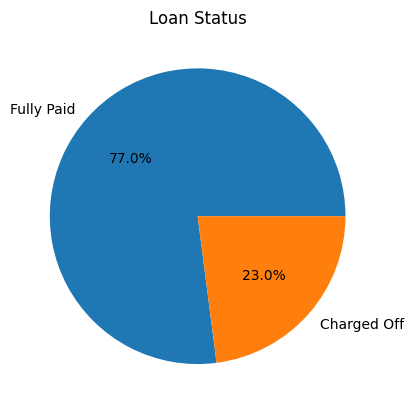

In [ ]:
counts = data['Loan Status'].value_counts()
print(counts)

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Loan Status')
plt.show()

<ipython-input-11-d3c5a1e9e10c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),linewidths=0.01 ,annot=True,cmap='viridis')


<Axes: >

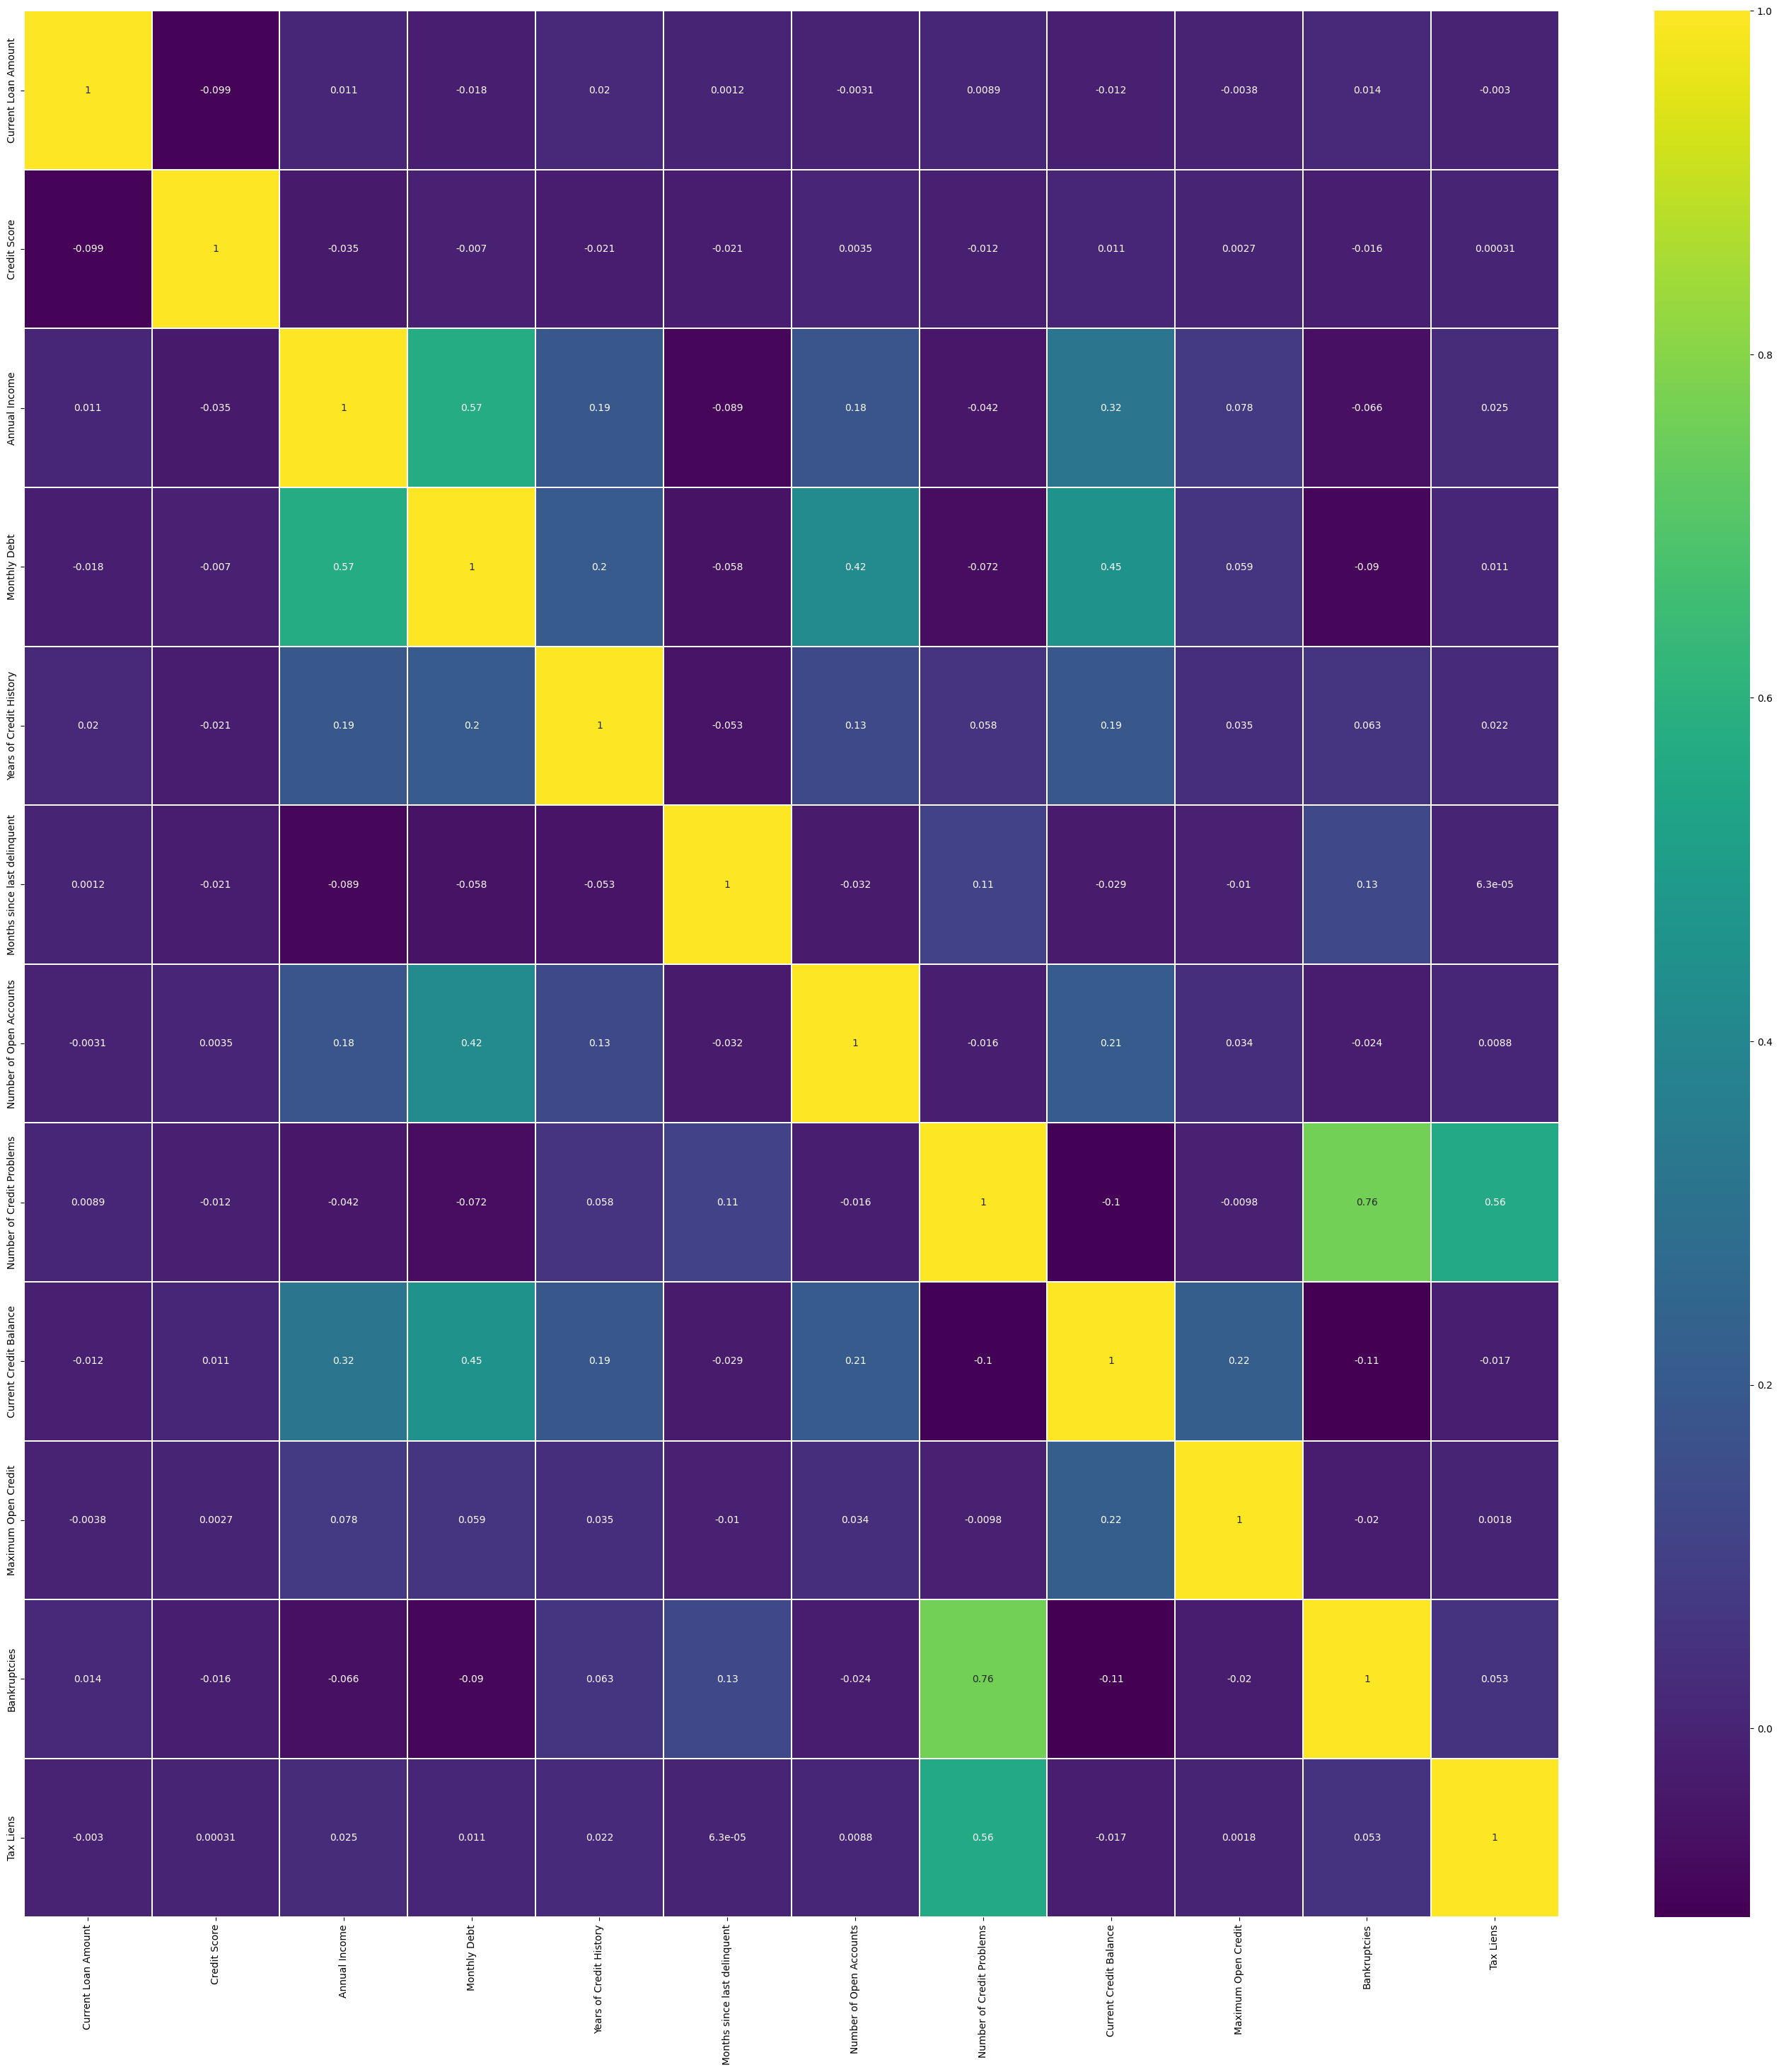

In [ ]:
from matplotlib import colors
import seaborn as sns
plt.figure(figsize=(35,35))
sns.heatmap(data.corr(),linewidths=0.01 ,annot=True,cmap='viridis')

In [ ]:
features=["Bankruptcies","Number of Credit Problems","Loan Status"]
df=data[features]
df.head()

,Bankruptcies,Number of Credit Problems,Loan Status
0,1.0,1.0,Fully Paid
1,0.0,0.0,Fully Paid
2,0.0,1.0,Fully Paid
3,0.0,0.0,Fully Paid
4,0.0,0.0,Fully Paid


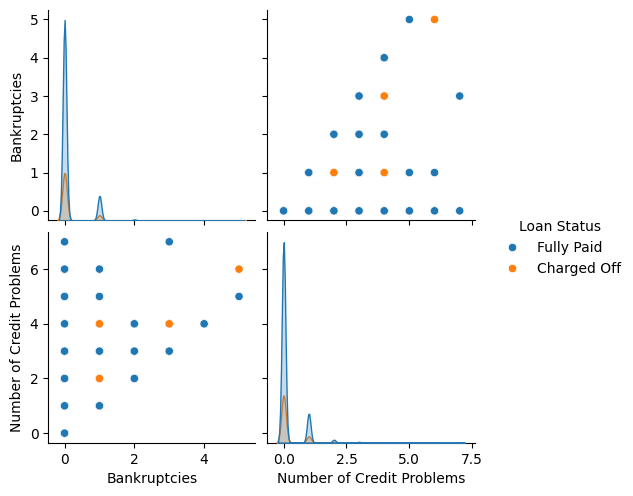

In [ ]:
sns.pairplot(data=df, hue='Loan Status')

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---





####Removing missing data

In [ ]:
# print how many missing value in each column
data.isnull().sum()

Loan ID                            0
Customer ID                        0
Loan Status                        0
Current Loan Amount                0
Term                               0
Credit Score                    3228
Annual Income                   3228
Years in current job             704
Home Ownership                     0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent    8945
Number of Open Accounts            1
Number of Credit Problems          1
Current Credit Balance             1
Maximum Open Credit                1
Bankruptcies                      38
Tax Liens                          3
dtype: int64

In [ ]:
# drop rows with missing values
data.dropna(inplace=True)
#checking if there's any missing values left
data.isnull().sum()

data =data.reset_index(drop=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6032 entries, 0 to 6031
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       6032 non-null   object 
 1   Customer ID                   6032 non-null   object 
 2   Loan Status                   6032 non-null   object 
 3   Current Loan Amount           6032 non-null   int64  
 4   Term                          6032 non-null   object 
 5   Credit Score                  6032 non-null   float64
 6   Annual Income                 6032 non-null   float64
 7   Years in current job          6032 non-null   object 
 8   Home Ownership                6032 non-null   object 
 9   Purpose                       6032 non-null   object 
 10  Monthly Debt                  6032 non-null   float64
 11  Years of Credit History       6032 non-null   float64
 12  Months since last delinquent  6032 non-null   float64
 13  Num

#### Remove unused columns

Let's remove the `categorical columns` since we only care about numerical features in our model

In [ ]:
non_floats = []
for col in data:
    if data[col].dtypes == "O" and col!="Loan Status":
        non_floats.append(col)
data = data.drop(columns=non_floats)
data.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,99999999,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
1,Fully Paid,217646,730.0,1184194.0,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
2,Fully Paid,548746,678.0,2559110.0,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
3,Fully Paid,99999999,728.0,714628.0,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
4,Fully Paid,99999999,740.0,776188.0,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0


## 4. Model Training & Testing



#### Data splits

Before training, we need to split data into training (80%) & testing (20%)

In [ ]:
# store all columns except first one as inputs in X
X = data.iloc[:,1:].values
# store the first column as the output (label) in y
y = data.iloc[:,0].values

from sklearn.model_selection import train_test_split
# split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4825, 12) (4825,)
(1207, 12) (1207,)


####Decision Tree Classifier

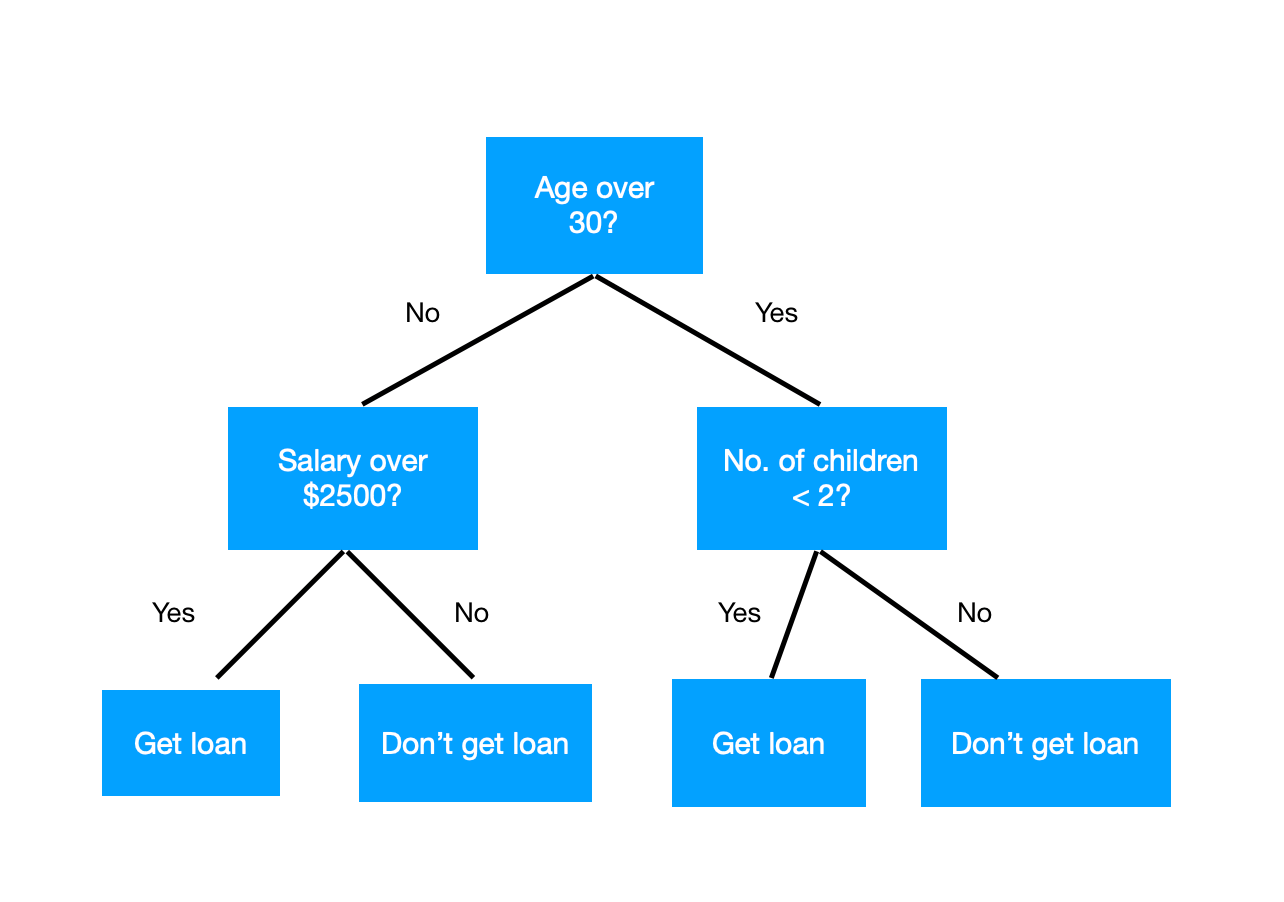

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#define our Decision Tree Classfier Model
model = DecisionTreeClassifier()

# train our model
model.fit(x_train, y_train)
print('Model trained!')

Model trained!


#### Evaluation

In [ ]:
accuracy=model.score(x_test,y_test)
print('Accuracy:',accuracy)

Accuracy: 0.7804473902236951


In [ ]:
# Get feature importances
importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(data.columns[0:-1], importances):
    print("{}: {}".format(feature, importance))

Loan Status: 0.13157507389307566
Current Loan Amount: 0.30781910745020863
Credit Score: 0.08940798229295863
Annual Income: 0.09221438574271815
Monthly Debt: 0.07696331938094043
Years of Credit History: 0.059043367639385246
Months since last delinquent: 0.06569785486082466
Number of Open Accounts: 0.0048613620588864774
Number of Credit Problems: 0.07154127400671395
Current Credit Balance: 0.08878787064469286
Maximum Open Credit: 0.008067353227750065
Bankruptcies: 0.004021048801845294


####New Predictions:

In [ ]:
new_pred=[[99999999,741,2231892,29200.53,14.9,29,18,1,297996,750090,0,0]]
print(model.predict(new_pred))

['Fully Paid']


In [ ]:
new_pred3=[[317108,687,1133274,9632.81,17.4,53,4,0,60287,126940,0,0]]
print(model.predict(new_pred3))

['Charged Off']


In [ ]:
new_pred4=[[317000,400,20000,11000,10,70,3,1,3000,4200,1,1]]
print(model.predict(new_pred4))

['Charged Off']
